In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kneed as kn
import plotly.graph_objects as go
import random

In [101]:
from plotly.subplots import make_subplots

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

In [102]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [103]:
df = pd.read_csv('train_PCA_v.1.csv')

In [104]:
df.head()

,0,1,2,3
0,-0.303998,0.289336,-0.765413,-0.619300
1,-2.303526,-0.484271,1.280632,-1.230840
2,-0.878138,-0.650216,0.468267,0.683850
3,-0.437008,0.229963,-0.591622,0.951554
4,8.928236,-0.280286,-1.633602,-1.117195


In [105]:
df.describe()

,0,1,2,3
count,1.592500e+04,1.592500e+04,1.592500e+04,1.592500e+04
mean,-5.354168e-18,-1.160070e-17,-3.658682e-17,-8.923614e-19
std,2.167120e+00,1.212333e+00,1.097839e+00,1.030960e+00
min,-2.796880e+00,-4.025769e+00,-5.059799e+00,-1.765276e+01
25%,-1.345544e+00,-7.364751e-01,-6.563911e-01,-5.465524e-01
50%,-6.220040e-01,1.140241e-01,-3.327226e-02,5.309459e-02
75%,6.447780e-01,7.408203e-01,5.888438e-01,6.209796e-01
max,2.442929e+01,1.123849e+01,9.564836e+00,7.167547e+00


In [106]:
# del df['popularityIndex']
# del df['originalTitle']
# del df['rating']
# del df['titleType']
# del df['countryOfOrigin']
# del df['genres']
# del df['isAdult']
# del df['isRatable']
# del df['canHaveEpisodes']

In [107]:
df.head()

,0,1,2,3
0,-0.303998,0.289336,-0.765413,-0.619300
1,-2.303526,-0.484271,1.280632,-1.230840
2,-0.878138,-0.650216,0.468267,0.683850
3,-0.437008,0.229963,-0.591622,0.951554
4,8.928236,-0.280286,-1.633602,-1.117195


In [108]:
#NORMALIZZAZIONE MINMAX O ZSCORE, COMMMENTARE UNA DELLE DUE RIGHE IN BASE AL TIPO DI NORMALIZZAZIONE CHE SI VUOLE UTILIZZARE
#NORMALIZZAZIONE MINMAX O ZSCORE, COMMMENTARE UNA DELLE DUE RIGHE IN BASE AL TIPO DI NORMALIZZAZIONE CHE SI VUOLE UTILIZZARE
#PER I NOSTRI DATI SEMBRA MEGLIO MIN/MAX
#PER I NOSTRI DATI SEMBRA MEGLIO MIN/MAX

# scaler = MinMaxScaler()

scaler = StandardScaler()

train_data = scaler.fit_transform(df)


In [109]:
def create_kdistance_graph(data, k):
  """Crea un grafico k-distance per i dati.

  Args:
    data: Un array numpy contenente i dati.
    k: Il numero di vicini da considerare.

  Returns:
    Un array numpy contenente le distanze k-esimo vicino per ogni punto.
  """

  # Calcola le distanze ai k vicini più vicini per ogni punto
  nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(data)
  distances, indices = nbrs.kneighbors(data)

  # Prendi la distanza dal k-esimo vicino più vicino
  distances = distances[:, k]
  distances = np.sort(distances, axis=0)

  return distances

In [110]:
# Esempio di utilizzo
epsilon_list = []

for k in range(2,51): # Numero di vicini
    distances = create_kdistance_graph(train_data, k)
    x = np.arange(len(distances))
    kn = KneeLocator(x, distances, curve='convex', direction='increasing')
    elbow_k = kn.elbow
    epsilon = distances[elbow_k]
    epsilon_list.append(epsilon)
    print("Epsilon ottimale secondo il metodo del gomito: k={} epsilon={}".format(k, epsilon))

media_epsilon = np.mean(epsilon_list)
print("La media degli epsilon è:", media_epsilon)


Epsilon ottimale secondo il metodo del gomito: k=2 epsilon=4.240988607824607
Epsilon ottimale secondo il metodo del gomito: k=3 epsilon=1.0060563759829664
Epsilon ottimale secondo il metodo del gomito: k=4 epsilon=0.9515635089736497
Epsilon ottimale secondo il metodo del gomito: k=5 epsilon=1.1468881251611007
Epsilon ottimale secondo il metodo del gomito: k=6 epsilon=1.1631612365225228
Epsilon ottimale secondo il metodo del gomito: k=7 epsilon=1.2785969998999034
Epsilon ottimale secondo il metodo del gomito: k=8 epsilon=1.2022459572812716
Epsilon ottimale secondo il metodo del gomito: k=9 epsilon=1.2569829109401236
Epsilon ottimale secondo il metodo del gomito: k=10 epsilon=1.431844464332703
Epsilon ottimale secondo il metodo del gomito: k=11 epsilon=1.448664537566791
Epsilon ottimale secondo il metodo del gomito: k=12 epsilon=1.3463280075863961
Epsilon ottimale secondo il metodo del gomito: k=13 epsilon=2.024508754456566
Epsilon ottimale secondo il metodo del gomito: k=14 epsilon=1.42

1.6147803646501229


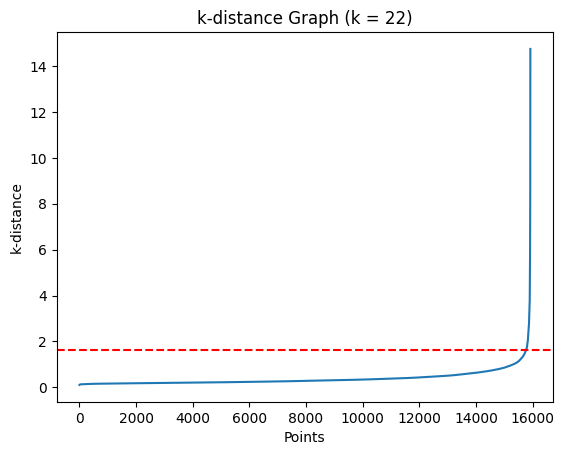

In [111]:
distances = create_kdistance_graph(train_data, 22)
kn = KneeLocator(x, distances, curve='convex', direction='increasing')
elbow_k = kn.elbow
epsilon = distances[elbow_k]
print(epsilon)

# Plotta il grafico
plt.plot(distances)
# Aggiungi la linea orizzontale
plt.axhline(y=epsilon, color='r', linestyle='--')
plt.xlabel('Points')
plt.ylabel('k-distance')
plt.title('k-distance Graph (k = 22)')
plt.show()

In [112]:
# density based clustering
print('DBSCAN')

dbscan = DBSCAN(eps=0.8, min_samples=5, metric='euclidean')
dbscan.fit(train_data)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

DBSCAN
labels {np.int64(-1): np.int64(207), np.int64(0): np.int64(15701), np.int64(1): np.int64(10), np.int64(2): np.int64(7), np.int64(3): np.int64(0)}
silhouette 0.4800924643006805


In [113]:
train_data = pd.DataFrame(train_data)

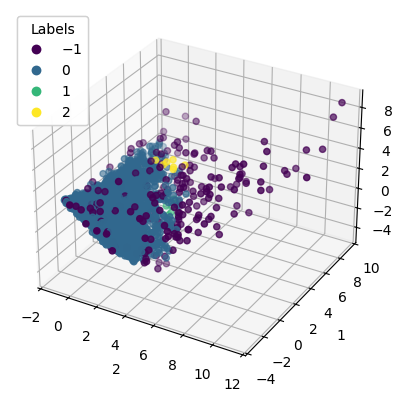

In [114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supponiamo che 'df' sia il tuo DataFrame e 'variable_3' sia la terza variabile
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crea il grafico 3D
scatter = ax.scatter(train_data[0], train_data[1], train_data[2], 
                     c=dbscan.labels_, cmap='viridis')

# Aggiungi etichette agli assi
ax.set_xlabel('2')
ax.set_ylabel('1')
ax.set_zlabel('3')

# Aggiungi una legenda
legend1 = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend1)

# Mostra il grafico
plt.show()

In [115]:
train_data.describe()

,0,1,2,3
count,1.592500e+04,1.592500e+04,1.592500e+04,1.592500e+04
mean,-4.461807e-18,-8.477433e-18,-1.472396e-17,-8.923614e-19
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-1.290638e+00,-3.320783e+00,-4.609017e+00,-1.712317e+01
25%,-6.209099e-01,-6.075049e-01,-5.979125e-01,-5.301557e-01
50%,-2.870277e-01,9.405637e-02,-3.030800e-02,5.150174e-02
75%,2.975369e-01,6.110891e-01,5.363831e-01,6.023501e-01
max,1.127305e+01,9.270425e+00,8.712695e+00,6.952519e+00


In [116]:
# Calcolo delle statistiche per ogni cluster
unique_labels = set(dbscan.labels_)
cluster_stats = {}

for label in unique_labels:
    if label != -1:  # Ignora il rumore
        cluster_points = train_data[dbscan.labels_ == label]
        cluster_stats[label] = {
            'num_points': len(cluster_points),
            'mean': np.mean(cluster_points, axis=0),
            'std_dev': np.std(cluster_points, axis=0)
        }

print("Cluster Statistics:")
for label, stats in cluster_stats.items():
    print(f"Cluster {label}:")
    print(f"  Number of Points: {stats['num_points']}")
    print(f"  Mean: {stats['mean']}")
    print(f"  Standard Deviation: {stats['std_dev']}")

Cluster Statistics:
Cluster 0:
  Number of Points: 15701
  Mean: 0   -0.057197
1   -0.023655
2   -0.027925
3    0.011855
dtype: float64
  Standard Deviation: 0    0.833908
1    0.946418
2    0.943282
3    0.907259
dtype: float64
Cluster 1:
  Number of Points: 10
  Mean: 0    3.498092
1    2.116473
2    0.248869
3   -0.287420
dtype: float64
  Standard Deviation: 0    0.270412
1    0.441756
2    0.404948
3    0.393095
dtype: float64
Cluster 2:
  Number of Points: 7
  Mean: 0    3.193645
1    2.498192
2    4.144739
3    1.114180
dtype: float64
  Standard Deviation: 0    0.461712
1    0.290066
2    0.217279
3    0.324280
dtype: float64
